In [1]:
import pandas as pd

import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
forcast_df = pd.read_csv('2021-11-15-all-forecasted-deaths-model-data.csv')

In [3]:
forcast_df['target'].unique()

array(['1 wk ahead cum death', '1 wk ahead inc death',
       '2 wk ahead cum death', '2 wk ahead inc death',
       '3 wk ahead cum death', '3 wk ahead inc death',
       '4 wk ahead cum death', '4 wk ahead inc death'], dtype=object)

In [4]:
forcast_df['forecast_date'] = pd.to_datetime(forcast_df['forecast_date']).dt.date
forcast_df = forcast_df[(forcast_df['target'] == '1 wk ahead cum death') |(forcast_df['target'] == '2 wk ahead cum death') | (forcast_df['target'] == '3 wk ahead cum death') |(forcast_df['target'] == '4 wk ahead cum death')]

In [5]:
forcast_df.tail()

,model,forecast_date,target,target_week_end_date,location_name,point,quantile_0.025,quantile_0.25,quantile_0.75,quantile_0.975
4670,USC,2021-11-15,4 wk ahead cum death,2021-12-11,Guam,278,265,276,280,289
4671,USC,2021-11-15,4 wk ahead cum death,2021-12-11,Northern Mariana Islands,3,3,3,3,7
4672,USC,2021-11-15,4 wk ahead cum death,2021-12-11,Puerto Rico,3293,3286,3289,3296,3300
4673,USC,2021-11-15,4 wk ahead cum death,2021-12-11,Virgin Islands,88,84,87,89,97
4674,USC,2021-11-15,4 wk ahead cum death,2021-12-11,National,790223,783745,788327,791722,803212


In [36]:
df_filter = forcast_df[forcast_df['model'] == 'BPagano']
df_filter = df_filter[df_filter['location_name'] == 'Illinois']

In [37]:
df_filter

,model,forecast_date,target,target_week_end_date,location_name,point,quantile_0.025,quantile_0.25,quantile_0.75,quantile_0.975
13,BPagano,2021-11-15,1 wk ahead cum death,2021-11-20,Illinois,28638,28617,28630,28645,28659
119,BPagano,2021-11-15,2 wk ahead cum death,2021-11-27,Illinois,28767,28715,28749,28785,28819
225,BPagano,2021-11-15,3 wk ahead cum death,2021-12-04,Illinois,28901,28804,28866,28934,28996
331,BPagano,2021-11-15,4 wk ahead cum death,2021-12-11,Illinois,29045,28876,28985,29102,29211


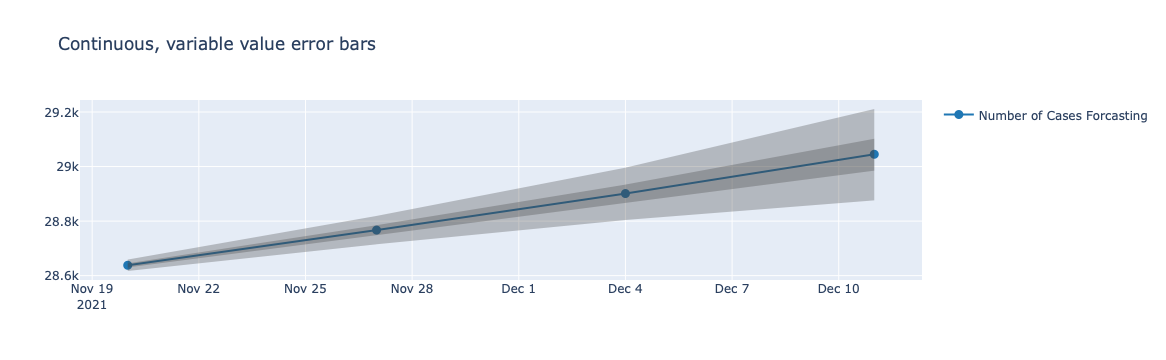

In [38]:
fig = go.Figure([
    go.Scatter(
        name='Number of Cases Forcasting',
        x = df_filter['target_week_end_date'],
        y = df_filter['point'],
        marker = dict(size=9),
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Lower 50% Prediction Interval',
        x = df_filter['target_week_end_date'],
        y = df_filter['quantile_0.25'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name = 'Upper 50% Prediction Interval',
        x = df_filter['target_week_end_date'],
        y = df_filter['quantile_0.75'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    ),
        go.Scatter(
        name='Lower 95% Prediction Interval',
        x = df_filter['target_week_end_date'],
        y = df_filter['quantile_0.025'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
        go.Scatter(
        name='Upper 95% Prediction Interval',
        x = df_filter['target_week_end_date'],
        y = df_filter['quantile_0.975'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    ),
])
fig.update_layout(
    yaxis_title='',
    title='Continuous, variable value error bars',
    hovermode="x"
)
fig.show()

In [62]:
df_report = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
df_abbrev = pd.read_csv('abbr-name.csv', header=None, names = ['state', 'location'])

In [63]:
df_report['submission_date'] = pd.to_datetime(df_report['submission_date']).dt.date
df_report = pd.merge(df_report, df_abbrev, on = 'state', how = 'inner')

In [64]:
df_report_filter = df_report[df_report['location'] == 'Illinois']
df_report_filter = df_report_filter[df_report_filter['submission_date'] < pd.to_datetime('2021-11-15')]

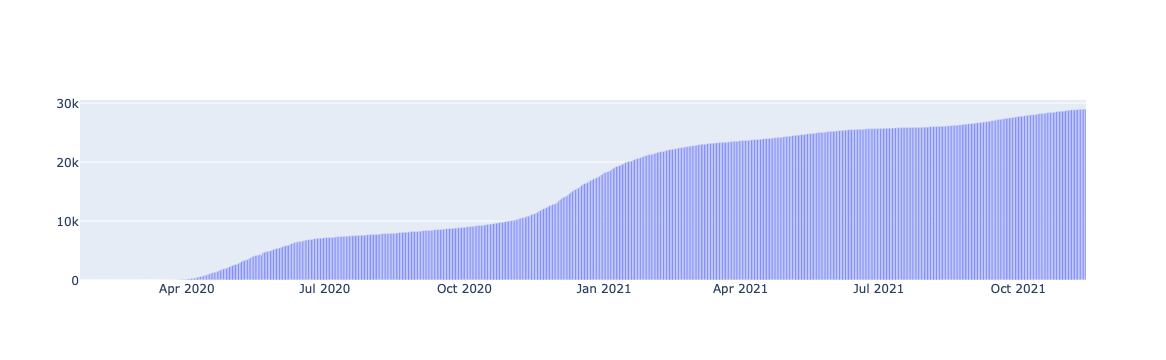

In [66]:
fig_1 = go.Figure([
    go.Bar(
        name='Number of Cases Forcasting',
        x = df_report_filter['submission_date'],
        y = df_report_filter['tot_death']
    ),
    
])

fig_1.show()

## Dashboard Code

In [1]:
import pandas as pd

import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Data processing forcasting death
forcast_death_df = pd.read_csv('2021-11-15-all-forecasted-deaths-model-data.csv')
forcast_death_df['forecast_date'] = pd.to_datetime(forcast_death_df['forecast_date']).dt.date
forcast_death_df = forcast_death_df[(forcast_death_df['target'] == '1 wk ahead cum death')|
                                    (forcast_death_df['target'] == '2 wk ahead cum death')|
                                    (forcast_death_df['target'] == '3 wk ahead cum death')|
                                    (forcast_death_df['target'] == '4 wk ahead cum death')]

In [4]:
# Data Processing Report
df_report = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
df_abbrev = pd.read_csv('abbr-name.csv', header=None, names = ['state', 'location_name'])
df_report['submission_date'] = pd.to_datetime(df_report['submission_date']).dt.date
df_report = pd.merge(df_report, df_abbrev, on = 'state', how = 'inner')

In [5]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

app = dash.Dash(__name__)

app.layout = html.Div(
    children=[

html.Div(
    children=[
        html.Div(children = 'Location Name', style={'fontSize': "24px"},className = 'menu-title'),
        dcc.Dropdown(
                    id = 'location_name',
                    options = [
                        {'label': location_name, 'value':str(location_name)} for location_name in forcast_death_df['location_name'].unique()
                    ], # State Filter
                    value = 'North Carolina',
                    clearable = False,
                    searchable = False,
                    className = 'dropdown', style={'fontSize': "24px",'textAlign': 'center'},
                ),
            ],
    className = 'menu',
),
        
html.Div(
    children=[
        html.Div(children = 'Forcasting Model', style={'fontSize': "24px"},className = 'menu-title'),
        dcc.Dropdown(
                    id = 'model',
                    options = [
                        {'label': model, 'value':str(model)} for model in ['BPagano', 'Ensemble', 'JHU-APL', 'USC', 'Microsoft', 'JHU-CSSE', 'Karlen']
                    ], # State Filter
                    value = 'Ensemble',
                    clearable = False,
                    searchable = False,
                    className = 'dropdown', style={'fontSize': "24px",'textAlign': 'center'},
                ),
            ],
    className = 'menu',
),
        html.Div(
            children=[
                html.Div(
                children = dcc.Graph(
                    id = 'forcast_case_graph',
                    figure = {},
                ),
                style={'width': '100%', 'display': 'inline-block'},
            ),
        ],
        className = 'graphs',
        ), 
    ]
)    

In [6]:
@app.callback(
    Output("forcast_case_graph", "figure"),
    Input("location_name", "value"), 
    Input("model", "value"))

def forcast_death_graph(location_name, model):
    
    # filter data   
    df_filter_death_forcast = forcast_death_df[forcast_death_df['model'] == model]
    df_filter_death_forcast = df_filter_death_forcast[df_filter_death_forcast['location_name'] == location_name]
    
    df_filter_report = df_report[df_report['location_name'] == location_name]
    df_filter_report = df_filter_report[(df_filter_report['submission_date'] <= pd.to_datetime('2021-11-15'))]
    df_filter_report = df_filter_report[(df_filter_report['submission_date'] > pd.to_datetime('2021-09-01'))]
    
    
    # death foresting
    fig_death = go.Figure([
        go.Scatter(
            name='Number of Death Forcasting',
            x = df_filter_death_forcast['target_week_end_date'],
            y = df_filter_death_forcast['point'],
            marker = dict(size=5),
            line=dict(color='rgb(250, 0, 0, 0.6)'),
        ),
        
        go.Scatter(
            name='Lower 50% Prediction Interval',
            x = df_filter_death_forcast['target_week_end_date'],
            y = df_filter_death_forcast['quantile_0.25'],
            mode='lines',
            marker=dict(color="#444"),
            line=dict(width=0),
            showlegend=False
        ),
        go.Scatter(
            name = 'Upper 50% Prediction Interval',
            x = df_filter_death_forcast['target_week_end_date'],
            y = df_filter_death_forcast['quantile_0.75'],
            marker=dict(color="#444"),
            line=dict(width=0),
            mode='lines',
            fillcolor='rgba(68, 68, 68, 0.3)',
            fill='tonexty',
            showlegend=False
        ),
        go.Scatter(
            name='Lower 95% Prediction Interval',
            x = df_filter_death_forcast['target_week_end_date'],
            y = df_filter_death_forcast['quantile_0.025'],
            mode='lines',
            marker=dict(color="#444"),
            line=dict(width=0),
            showlegend=False
        ),
        go.Scatter(
            name='Upper 95% Prediction Interval',
            x = df_filter_death_forcast['target_week_end_date'],
            y = df_filter_death_forcast['quantile_0.975'],
            marker=dict(color="#444"),
            line=dict(width=0),
            mode='lines',
            fillcolor='rgba(68, 68, 68, 0.3)',
            fill='tonexty',
            showlegend=False
        ),
        go.Bar(
            name='Number of Death Reported',
            x = df_filter_report['submission_date'],
            y = df_filter_report['tot_death'],
            
    ),
    ])
    
    fig_death.update_layout(
        yaxis_title='Number of Death',
        title='Reported and Forcast Number of Death By State',
        hovermode="x"
    )

    return fig_death

In [7]:
app.run_server(debug=True, use_reloader=False) 

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
